<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Reformulating_Interpolation_and_generating_new_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log

import math
import pandas as pd

import scipy

In [3]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

## Note; Column names appear in the first row of the dataframe.  This is an extra row.

## Renaming all of the columns of the dataframe using entries in the first row.
header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()
Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )
## Removing the extra row.
Pion_Plots_df1 = Pion_Plots_df1.drop(0)
Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

In [4]:
############## MANIPULATING THE DATAFRAME INTO DESIRED CONFIGURATION #################

## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)

## Adding new columns to the dataframe

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()
Pion_Plots_df1['bin width'] = bin_width_array.tolist()

## Moving the newly created columns tto desired positions

column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value") # storing a ccolumn in the dataframe as a neew variable
Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move) # moving the stored column to the desired place in the dataframe.

column_to_move = Pion_Plots_df1.pop("bin width")
Pion_Plots_df1.insert(2, "bin width", column_to_move)

## Allocating colours to rows of the dataframe based upon pion transverse momentum
## Creating a new column in the dataframe to store these allocated colour codes

pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)

## Creating a new pT colour codes column in dataframe and moving it to the desired position.

Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)

## Converting columns into floats - in order to make plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)

## We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

## creating a new column in the dataframe that will be filled with the final values to be plotted in the complete and correct plot

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

#################### Using df.loc - this is in line with the Copy on Write - Old way is through Chained Assignment (for loop etc., etc.) ####################

Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300

## Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)


## Adding two columns for plotting purposes

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)

In [5]:
######################### SELECTING THE PIONS WITH SUFFICIENT ENERGY - BY REMOVING PIONS WITH LONGITUDINAL MOMENTUM LESS THAN 5GeV/c  ######################

######################### SEE COMMENT AT END OF FIRST LINE ######################

# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )    ## I have no idea how this line of code works ##
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
# green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 5]
# green_dots_new_y = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_new_x) ) : len(green_dots_only_y_axis_values_list) ]  )

red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['Final pi^+ plot value'] )
red_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['pz (GeV=c) - mid range value'] )
# red_dots_new_x = [red_dots_only_x_axis_values_list for red_dots_only_x_axis_values_list in red_dots_only_x_axis_values_list if red_dots_only_x_axis_values_list >= 5]
# red_dots_new_y = ( red_dots_only_y_axis_values_list[  len(red_dots_only_y_axis_values_list)  - ( len(red_dots_new_x) ) : len(red_dots_only_y_axis_values_list) ]  )

blue_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['Final pi^+ plot value'] )
blue_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['pz (GeV=c) - mid range value'] )
# blue_dots_new_x = [blue_dots_only_x_axis_values_list for blue_dots_only_x_axis_values_list in blue_dots_only_x_axis_values_list if blue_dots_only_x_axis_values_list >= 5 ]
# blue_dots_new_y = ( blue_dots_only_y_axis_values_list[  len(blue_dots_only_y_axis_values_list)  - ( len(blue_dots_new_x) ) : len(blue_dots_only_y_axis_values_list) ] )

purple_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['Final pi^+ plot value'] )
purple_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['pz (GeV=c) - mid range value'] )
# purple_dots_new_x = [purple_dots_only_x_axis_values_list for purple_dots_only_x_axis_values_list in purple_dots_only_x_axis_values_list if purple_dots_only_x_axis_values_list >= 5 ]
# purple_dots_new_y = ( purple_dots_only_y_axis_values_list[  len(purple_dots_only_y_axis_values_list)  - ( len(purple_dots_new_x) ) : len(purple_dots_only_y_axis_values_list) ] )

orange_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['Final pi^+ plot value'] )
orange_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['pz (GeV=c) - mid range value'] )
# orange_dots_new_x = [orange_dots_only_x_axis_values_list for orange_dots_only_x_axis_values_list in orange_dots_only_x_axis_values_list if orange_dots_only_x_axis_values_list >= 5 ]
# orange_dots_new_y = ( orange_dots_only_y_axis_values_list[ len(orange_dots_only_y_axis_values_list)  - ( len(orange_dots_new_x) ) : len(orange_dots_only_y_axis_values_list) ] )

brown_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['Final pi^+ plot value'] )
brown_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['pz (GeV=c) - mid range value'] )
# brown_dots_new_x = [brown_dots_only_x_axis_values_list for brown_dots_only_x_axis_values_list in brown_dots_only_x_axis_values_list if brown_dots_only_x_axis_values_list >= 5 ]
# brown_dots_new_y = ( brown_dots_only_y_axis_values_list[ len(brown_dots_only_y_axis_values_list)  - ( len(brown_dots_new_x) ) : len(brown_dots_only_y_axis_values_list) ] )



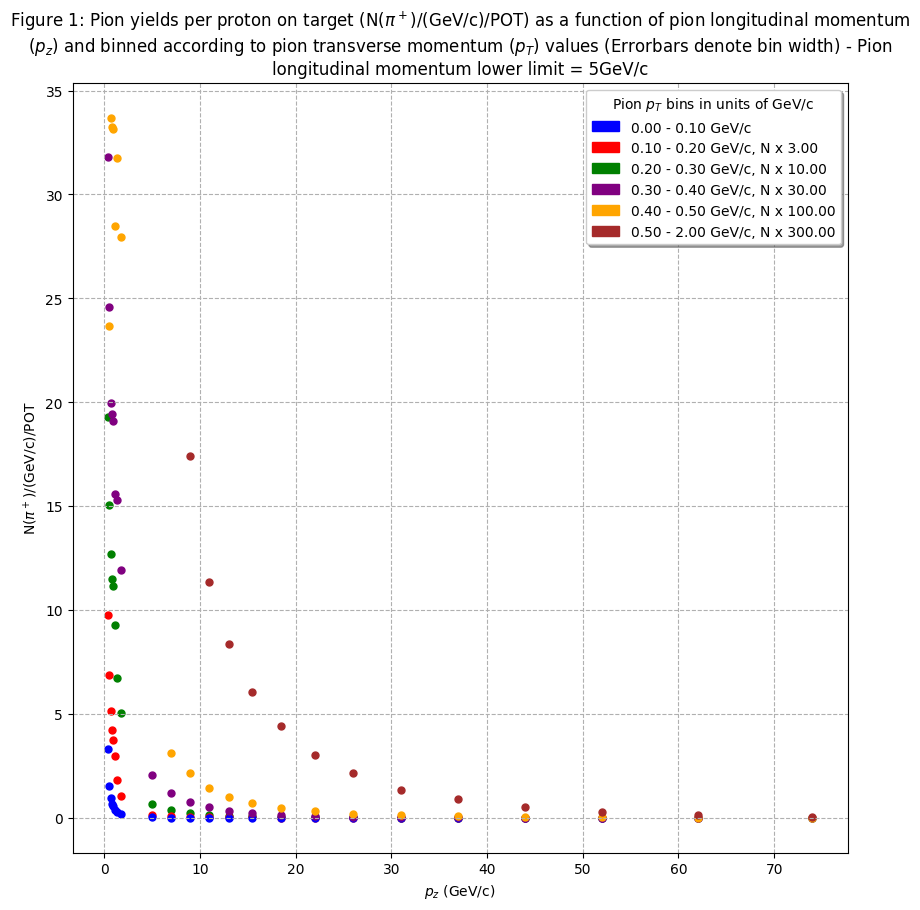

In [6]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )

###################### ERROR BAR PLOTTING HAS BEEN REMOVED TO PREVENT THIS CELL FROM BUGGING OUT ###########################

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )


# plt.xscale("log")
# plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal momentum lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

Now fit a function to the plot above

def model_function(t, a, b)
  returns: [link text](https://)

In [7]:
def model_function(t, a, b):

   return a*np.exp(b*t)

In [8]:
green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

x = green_dots_x_array

green_dots_y_array = np.array(green_dots_only_y_axis_values_list)

y = green_dots_y_array

p0 = [ 15 , -0.5 ]

params , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

first_try = -3.75689726e-17*np.exp(1.000 * x)

print(type(first_try))
print(np.shape(first_try))

<class 'numpy.ndarray'>
(23,)


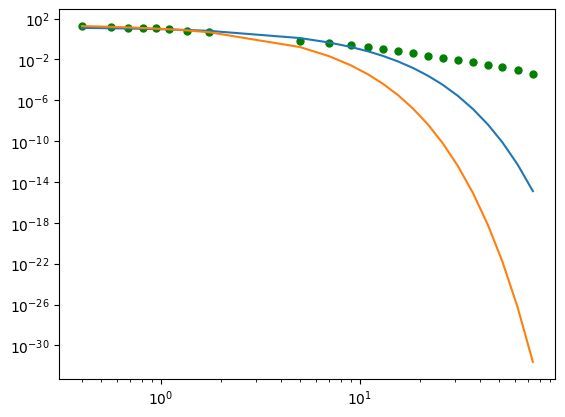

In [9]:
plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )


plt.plot( x, model_function(x, p0[0] , p0[1]) )


plt.plot( x, model_function(x, params[0] , params[1]) )

plt.xscale("log")
plt.yscale("log")




#WEEK 12 CODING

[27.70273899 -1.02873182]


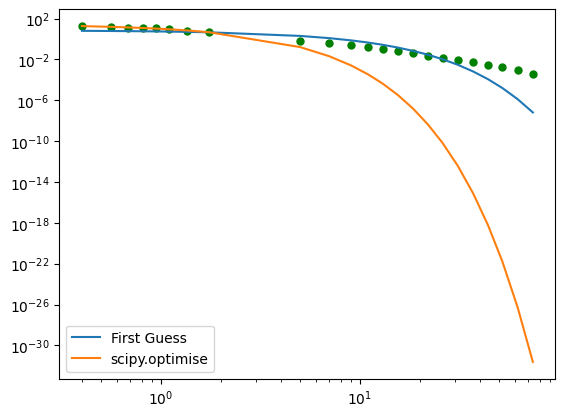

In [24]:
green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

x = green_dots_x_array

green_dots_y_array = np.array(green_dots_only_y_axis_values_list)

y = green_dots_y_array

p0 = [ 7 , -0.25 ]

params , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  None)

plt.plot( x, model_function(x, p0[0] , p0[1]) , label =  "First Guess" )

plt.plot( x, model_function(x, params[0] , params[1])  , label =  "scipy.optimise" )

plt.legend()

print(params)

plt.xscale("log")
plt.yscale("log")
